In [1]:
import pandas as pd
video_subtitle_data = pd.read_json("video_subtitle_data_copy.json")

In [2]:
from datetime import datetime
datelist=[]
for i in video_subtitle_data['trending_date_x']:
    datetime_object = datetime.strptime(i, '%y.%d.%m')
    datelist.append(datetime_object)
video_subtitle_data['Date']=datelist
# datetime_object = datetime.strptime(video_subtitle_data['trending_date_x'][0], '%y.%d.%m')

In [3]:
# wordslist=[]
# for index, row in video_subtitle_data.iterrows():
#     wordlist=row['Subtitles'].split()
#     wordslist.append(wordlist)
# video_subtitle_data['wordlist']=wordslist

In [4]:
company_names = pd.read_csv("constituents.csv.txt", sep=',',encoding='latin-1')

In [5]:
# # company_names

# namelist=[]
# ratiocount=[]
# for j in company_names['Name']:
#     k=j.split()
#     for word in k:
#         counter=0
#         for i in video_subtitle_data['wordlist']:
#             if word in i:
#         #         print(True)
#                 counter+=1
#         ratio=counter/float(len(video_subtitle_data['wordlist']))
#         print(word, ratio)
#         namelist.append(word)
#         ratiocount.append(ratio)
    
# eval_frame = pd.DataFrame()
# eval_frame['Company_Term']=namelist
# eval_frame['Dataset_Ratio']=ratiocount

In [6]:
# eval_frame2=eval_frame.groupby(['Company_Term']).sum().sort_values('Dataset_Ratio', ascending=False)

In [7]:
# list of all companies that have mentions/occurrences in more than 0.000315 of Youtube Videos
company_list=[
"Apple",
"Netflix",
"McDonald's",
"Facebook,",
"CBS",
"eBay",
"Starbucks",
"Microsoft",
"Ford",
"Nvidia",
# "HP",
# "FedEx",
# "Lockheed",
# "Nike",
# "Verizon"
]

In [8]:
# video_subtitle_data
name_index_list=[]
for name in company_list:
    indexlist=[]
    for index, row in video_subtitle_data.iterrows():
        if name in row['wordlist']:
            indexlist.append(row['video_id'])
    name_index_list.append(indexlist)

In [9]:
# name1
# remove_list
# name_index_list
# remove_list=name_index_list[0]
# name1 = video_subtitle_data[video_subtitle_data['video_id'].isin(remove_list)]
dflist=[]
for remove_list in name_index_list:
    df = video_subtitle_data[video_subtitle_data['video_id'].isin(remove_list)]
    dflist.append(df)

In [10]:
import matplotlib.pyplot as plt
for number in range(len(company_list)):
    name = company_list[number]
    dataset = dflist[number]
    sentiment_data = dataset['sentiment']
    dates = dataset['Date']
    plt.plot(dates,sentiment_data)
    plt.title(name)
    plt.xlabel("Date")
    plt.ylabel("Sentiment")
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [11]:
# Amendments:
## Consider downweighting certain sentiment by views of the video (avoid extreme content for niche audiences)
## Consider counting change in sentiment from beginning of video to end of video

In [12]:
# df_list =[]
# for i in range(15):
#     df_list.append(pd.read_csv("df_export"+str(i)+".csv"))
df_list =[]
for i in range(15):
    df_list.append(pd.read_json("df_export"+str(i)+".json"))

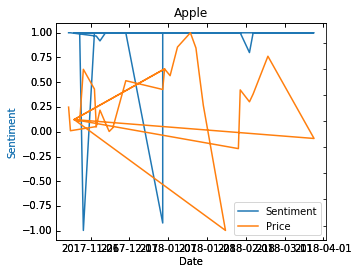

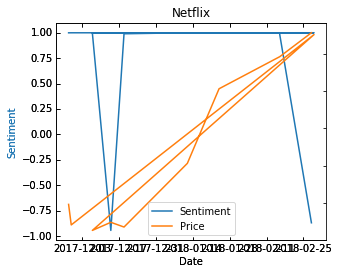

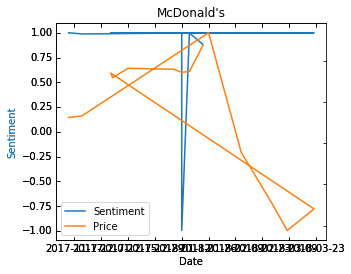

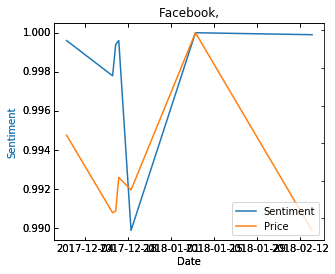

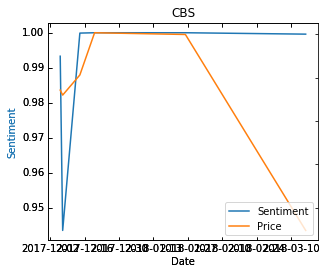

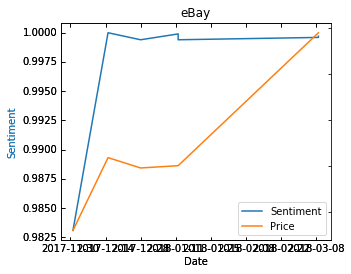

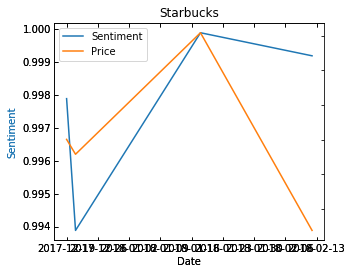

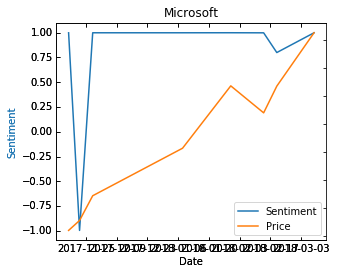

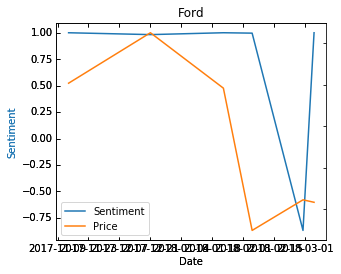

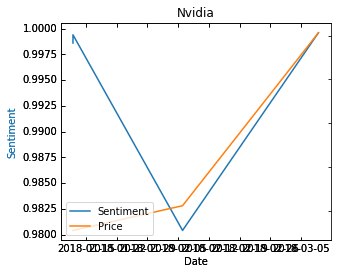

In [13]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
for number in range(len(company_list)):
    name = company_list[number]
    dataset = df_list[number]
    sentiment_data = dataset['sentiment']
    price_data = dataset['Close']
    dates = dataset['Date']
    
    
#     plt.plot(dates,sentiment_data)
#     plt.title(name)
#     plt.xlabel("Date")
#     plt.ylabel("Sentiment")
#     plt.show()
    
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)

    par1 = host.twinx()
#     par2 = host.twinx()

    offset = 60
    # new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
    #                                         offset=(offset, 0))

    # par2.axis["right"].toggle(all=True)

    # host.set_xlim(0, 2)
    # host.set_ylim(0, 2)

    host.set_xlabel("Date")
    host.set_title(name)
    host.set_ylabel("Sentiment")
    par1.set_ylabel("Price")
    # par2.set_ylabel("Velocity")

    p1, = host.plot(dates, sentiment_data, label="Sentiment")
    p2, = par1.plot(dates, price_data, label="Price")
    # p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

    # par1.set_ylim(0, 4)
    # par2.set_ylim(1, 65)

    host.legend()

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    # par2.axis["right"].label.set_color(p3.get_color())

    plt.draw()
    plt.show()

    #plt.savefig("Test")

In [14]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

pd.set_option('display.max_columns', 100) # Print 100 Pandas columns

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 10 , 6

In [16]:
import numpy as np

model_list=[]
for number in range(len(company_list)):
    name = company_list[number]
    dataset = df_list[number]
#     dataset = df_list[number][0:int(len(df_list[number])/2)]
#     print(dataset)
#     sentiment_data = [[dataset['sentiment']], [dataset['views']]] #, dataset['likes'], dataset['dislikes'], dataset['comment_count']]
    sentiment_data = dataset.ix[:,['sentiment', 'views', 'likes', 'dislikes', 'comment_count']]
#     sentiment_data = dataset['sentiment']

#     nsamples, nx, ny = sentiment_data.shape
    sentiment_data = sentiment_data #.reshape((nsamples,nx*ny))
    
    price_data = dataset['Close']
    dates = dataset['Date']
    
    import numpy as np
    from sklearn import linear_model
    from sklearn import svm

    classifiers = [
        svm.SVR(),
        linear_model.SGDRegressor(),
        linear_model.BayesianRidge(),
        linear_model.LassoLars(),
        linear_model.PassiveAggressiveRegressor(),
        linear_model.TheilSenRegressor(),
        linear_model.LinearRegression()
    ]

    trainingData    = np.array(sentiment_data)#.reshape(-1, 1)
    trainingScores  = np.array(price_data)#.reshape(-1, 1)
    predictionData  = np.array(sentiment_data)#.reshape(-1, 1)

    
    from sklearn.metrics import accuracy_score
    clf_list=[]
    score_list=[]
    for item in classifiers:
#         print(item)
        clf = item
        clf.fit(trainingData, trainingScores)
#         print(clf.predict(predictionData),'\n')
#         print(clf.score(predictionData,trainingScores))
#         print("+++++++++++++++++++++++++++++++++++++++++++")
        clf_list.append(clf)
        score_list.append(clf.score(predictionData,trainingScores))
    best = score_list.index(max(score_list))
    best_model = clf_list[best]
    model_list.append(best_model)
    
    import pickle
    filename = 'model'+str(number)+'.sav'
    pickle.dump(best_model, open(filename, 'wb'))

    
#         y_pred=clf.predict(predictionData)
#         y_true=trainingScores
#         print(accuracy_score(y_true, y_pred))
    

In [17]:
# len(model_list)
stock_model_df = pd.DataFrame()
stock_model_df['company']=company_list
stock_model_df['model']=model_list

In [18]:
stock_model_df

,company,model
0,Apple,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3..."
1,Netflix,"LinearRegression(copy_X=True, fit_intercept=Tr..."
2,McDonald's,"LinearRegression(copy_X=True, fit_intercept=Tr..."
3,"Facebook,","LinearRegression(copy_X=True, fit_intercept=Tr..."
4,CBS,"LinearRegression(copy_X=True, fit_intercept=Tr..."
5,eBay,"LinearRegression(copy_X=True, fit_intercept=Tr..."
6,Starbucks,"TheilSenRegressor(copy_X=True, fit_intercept=T..."
7,Microsoft,"LinearRegression(copy_X=True, fit_intercept=Tr..."
8,Ford,"TheilSenRegressor(copy_X=True, fit_intercept=T..."
9,Nvidia,"TheilSenRegressor(copy_X=True, fit_intercept=T..."


In [19]:
profitList=[]

for number in range(len(company_list)):
    
    filename = 'model'+str(number)+'.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    
    name = company_list[number]
    
    print("Stock: ", name)
    
    
    dataset = df_list[number]
#     model = model_list[number]
#     dataset = df_list[number][int(len(df_list[number])/2)+1:len(df_list[number])]
    data = dataset.ix[:,['Close', 'sentiment', 'views', 'likes', 'dislikes', 'comment_count']]
    
    buycounter=0
    sellcounter=0
#     trigger = MAGICNUMBER
    
    bought=0
    sold=0
    
    buyList=[]
    sellList=[]
    
    
    capital = 100000
    transaction_quantity=100
    
    
    for index, row in data.iterrows():
        currentPrice = row['Close']
        input_data = row.ix[['sentiment', 'views', 'likes', 'dislikes', 'comment_count']]
        input_df = np.array(input_data).reshape(1, -1)
#         print(input_data)
#         print(row.ix[1:])
#         predictedPrice = loaded_model.predict(np.array(row.ix[1:]).reshape(-1, 1))
#         predictedPrice = loaded_model.predict(row.iloc[:,1:])
#         input_df = np.array([row['sentiment'], row['views'], row['likes'], row['dislikes'], row['comment_count']])#.reshape(-1, 1)
        predictedPrice = loaded_model.predict(input_df)
        
        if predictedPrice-currentPrice > 0:
            buycounter+=1
        if predictedPrice/currentPrice > 1.5:
            buycounter=3
            
        if predictedPrice-currentPrice < 0:
            sellcounter+=1
        if predictedPrice/currentPrice < 0.75:
            sellcounter=3
        
        if buycounter==3:
            buyList.append(currentPrice)
            print("Bought at", currentPrice)
            buycounter=0
            bought+=1
        
        if sellcounter==3:
            sellList.append(currentPrice)
            print("Sold at", currentPrice)
            sellcounter=0
            sold+=1
            
            
        # profit calculation
        if len(buyList)>0:
            if len(sellList)>0:
                if len(buyList) > len(sellList):
                    for closePrice in buyList:
                        profitList.append(currentPrice*transaction_quantity-closePrice*transaction_quantity)
                        print("Profit", currentPrice*transaction_quantity-closePrice*transaction_quantity)
                        buyList=[]
                        sellList=[]
                        capital=capital-closePrice*transaction_quantity
                        capital=capital+currentPrice*transaction_quantity
#                         capital=capital+(currentPrice-closePrice)
                if len(buyList) < len(sellList):
                    for closePrice in sellList:
                        profitList.append(closePrice*transaction_quantity-currentPrice*transaction_quantity)
                        print("Profit", closePrice*transaction_quantity-currentPrice*transaction_quantity)
                        buyList=[]
                        sellList=[]
                        capital=capital-closePrice*transaction_quantity
                        capital=capital+currentPrice*transaction_quantity
#                         capital=capital+(closePrice-currentPrice)
            
        if index == len(data)-1:
            if len(buyList)>0:
                if len(sellList)==0:
                    for closePrice in buyList:
                        profitList.append(currentPrice*transaction_quantity-closePrice*transaction_quantity)
                        print("Profit", currentPrice*transaction_quantity-closePrice*transaction_quantity)
                        capital=capital-closePrice*transaction_quantity
                        capital=capital+currentPrice*transaction_quantity
            if len(sellList)>0:
                if len(buyList)==0:
                    for closePrice in sellList:
                        profitList.append(closePrice*transaction_quantity-currentPrice*transaction_quantity)
                        print("Profit", closePrice*transaction_quantity-currentPrice*transaction_quantity)
                        capital=capital-closePrice*transaction_quantity
                        capital=capital+currentPrice*transaction_quantity
                        
print("Capital left", capital)
print("Return rate", float(capital-100000)/100000)
#         print(predictedPrice-currentPrice)

Stock:  Apple
Bought at 169.48
Bought at 169.01
Sold at 173.03
Profit 355.0
Profit 402.0
Sold at 175.0
Sold at 177.09
Sold at 174.22
Bought at 171.51
Profit 349.0
Profit 558.0
Profit 271.0
Bought at 170.15
Sold at 176.21
Bought at 168.34
Profit -181.0
Profit 0.0
Sold at 173.07
Bought at 169.48
Stock:  Netflix
Bought at 185.2
Sold at 261.279
Sold at 291.38
Profit -3010.0999999999985
Profit 0.0
Stock:  McDonald's
Sold at 163.9
Bought at 154.44
Sold at 172.91
Profit -901.0
Profit 0.0
Bought at 173.68
Sold at 176.81
Stock:  Facebook,
Sold at 178.39
Bought at 177.36
Stock:  CBS
Sold at 58.13
Sold at 50.95
Profit 718.0
Profit 0.0
Stock:  eBay
Bought at 37.92
Profit 589.0
Stock:  Starbucks
Sold at 55.38
Profit 0.0
Stock:  Microsoft
Bought at 84.88
Sold at 92.72
Stock:  Ford
Sold at 10.61
Bought at 10.58
Stock:  Nvidia
Bought at 225.58
Profit 1975.0
Capital left 101975.0
Return rate 0.01975


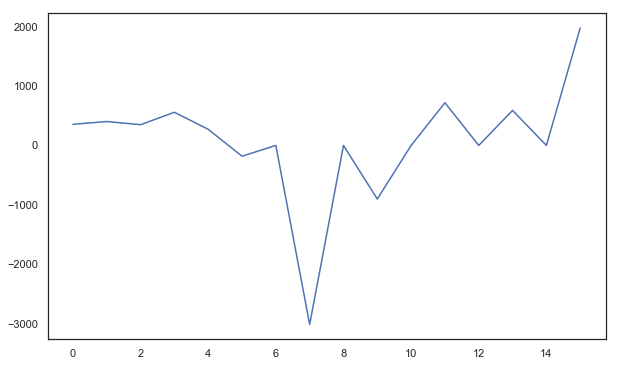

In [20]:
plt.plot(range(len(profitList)), profitList)